## Day 27 Lecture 1 Assignment

In this assignment, we will learn statistical significance in linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ds_useful

[My Useful Data Science Functions](https://github.com/cobyoram/python-for-data-scientists/blob/master/ds_useful.py)

In [113]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [114]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will predict app ratings using other features describing the app. To use these features, we must clean the data.

Start by creating dummy variables out of the type and content rating columns.

In [115]:
# answer below:

dummy_reviews = pd.get_dummies(reviews.select_dtypes('object'), drop_first=True)
dummy_reviews

for col in reviews.select_dtypes('number'):
    dummy_reviews[col] = reviews[col]

dummy_reviews

,App_+Download 4 Instagram Twitter,App_- Free Comics - Comic Apps,App_.R,App_/u/app,App_058.ba,App_1. FC Köln App,App_10 Best Foods for You,App_10 Minutes a Day Times Tables,App_10 WPM Amateur ham radio CW Morse code trainer,"App_10,000 Quotes DB (Premium)",...,Android Ver_5.0 - 8.0,Android Ver_5.0 and up,Android Ver_5.1 and up,Android Ver_6.0 and up,Android Ver_7.0 - 7.1.1,Android Ver_7.0 and up,Android Ver_7.1 and up,Android Ver_8.0 and up,Android Ver_Varies with device,Rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.5
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
10838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
10839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4.5


Next, check for missing values and remove all rows containing missing values

In [116]:
# answer below:

ds_useful.missingness_summary(dummy_reviews, print_log=True, sort='desc')

missing_index = dummy_reviews.loc[dummy_reviews['Rating'].isnull()].index
print(missing_index)

dummy_reviews.drop(missing_index, axis=0, inplace=True)

print('\nBecause Rating is our target variable, and we don\'t want to interpolate or fill that data without predicting it(which is what our model is for...) so! We\'ll just get rid of those rows!')

Rating                                13.596532
App_PORTABLE SOCCER DX Lite            0.000000
App_Painting Lulu DC Super Friends     0.000000
App_PakWheels: Buy & Sell Cars         0.000000
App_Palace Pets in Whisker Haven       0.000000
                                        ...    
Reviews_4751                           0.000000
Reviews_475369                         0.000000
Reviews_4756                           0.000000
Reviews_47576                          0.000000
App_+Download 4 Instagram Twitter      0.000000
Length: 20634, dtype: float64
Int64Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,
              185,
            ...
            10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835,
            10838],
           dtype='int64', length=1474)

Because Rating is our target variable, and we don't want to interpolate or fill that data without predicting it(which is what our model is for...) so! We'll just get rid of those rows!


To simplify, we will remove the app, category, size, installs, genres, last updated, current ver, and android ver columns. 

In [117]:
# answer below:

reviews.columns

reviews.drop(['App', 'Category', 'Installs', 'Genres', 'Last Updated', 'Current Ver', 'Size', 'Android Ver'], axis=1, inplace=True)
reviews.drop(missing_index, axis=0, inplace=True)

reviews

,Rating,Reviews,Type,Price,Content Rating
0,4.1,159,Free,0,Everyone
1,3.9,967,Free,0,Everyone
2,4.7,87510,Free,0,Everyone
3,4.5,215644,Free,0,Teen
4,4.3,967,Free,0,Everyone
...,...,...,...,...,...
10834,4.0,7,Free,0,Everyone
10836,4.5,38,Free,0,Everyone
10837,5.0,4,Free,0,Everyone
10839,4.5,114,Free,0,Mature 17+


In [121]:
drop_index = reviews.loc[reviews['Type']== '0'].index

reviews.drop(drop_index, axis=0, inplace=True)


In [126]:
reviews['Reviews'] = reviews['Reviews'].apply(lambda x: int(x))

reviews.Reviews.max()

78158306

In [129]:
reviews['Price'] = reviews['Price'].apply(lambda x: float(x.replace('$', '')))

print(reviews['Price'].max())

400.0

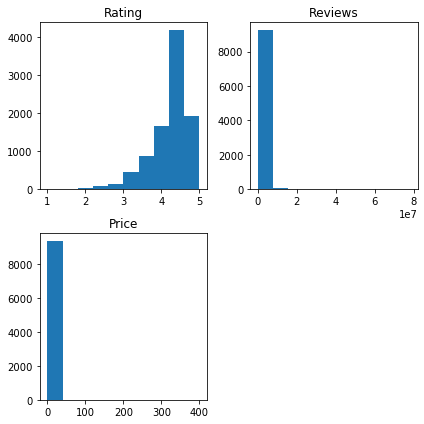

In [130]:
ds_useful.auto_subplots(reviews)

Next, check that all the columns are of numeric type and change the type of columns that are not numeric. If coercing to numeric causes missing values, remove those rows containing missing values from our dataset.

In [131]:
# answer below:

reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 5 columns):
Rating            9366 non-null float64
Reviews           9366 non-null int64
Type              9366 non-null object
Price             9366 non-null float64
Content Rating    9366 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 759.0+ KB


In [132]:
reviews_num = pd.get_dummies(reviews, drop_first=True)
for col in reviews.select_dtypes('number'):
    reviews_num[col] = reviews[col]

In [133]:
reviews_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 9 columns):
Rating                         9366 non-null float64
Reviews                        9366 non-null int64
Price                          9366 non-null float64
Type_Paid                      9366 non-null uint8
Content Rating_Everyone        9366 non-null uint8
Content Rating_Everyone 10+    9366 non-null uint8
Content Rating_Mature 17+      9366 non-null uint8
Content Rating_Teen            9366 non-null uint8
Content Rating_Unrated         9366 non-null uint8
dtypes: float64(2), int64(1), uint8(6)
memory usage: 667.6 KB


Perform a train test split with 20% of the data in the test sample.

In [135]:
# answer below:
Y = reviews_num['Rating']
X = reviews_num.drop('Rating', axis=1)


from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=1)

Now generate a linear model using statsmodels or sklearn and produce a p value for each coefficient in the model. Analyze the results.

In [150]:
#answer below:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

lrm = sm.OLS(Y_train, X_train)
results = lrm.fit()

In [149]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.422
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           1.86e-11
Time:                        10:03:39   Log-Likelihood:                -5195.4
No. Observations:                7024   AIC:                         1.041e+04
Df Residuals:                    7015   BIC:                         1.047e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           4.5496      0.359     12.683      0.000       3.846       5.253
Reviews                      1.185e-08   2.06e-09      5.763      0.000    7.82e-09    1.59e-08
Price                          -0.0012      0.000     -2.611      0.009      -0.002      -0.000
Type_Paid                       0.1077      0.024      4.409      0.000       0.060       0.156
Content Rating_Everyone        -0.3698      0.359     -1.031      0.303      -1.073       0.334
Content Rating_Everyone 10+    -0.3299      0.360     -0.916      0.359      -1.035       0.376
Content Rating_Mature 17+      -0.4256      0.360     -1.183      0.237      -1.131       0.280
Content Rating_Teen            -0.3340      0.359     -0.930      0.352      -1.038       0.370
Content Rating_Unrated         -0.4496      0.621     -0.724      0.469      -1.668       0.768
==============================================================================
Omnibus:                     2818.751   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14868.205
Skew:                          -1.871   Prob(JB):                         0.00
Kurtosis:                       9.066   Cond. No.                     4.52e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
# None of the content rating features have a significant p-value. We can assert that those features do not significantly add to the explanation of the model.